In [2]:
import networkx as nx
import osmnx as ox
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__

'0.11.4'

## Get the shapefile for one city, project it, display it, and save it

In [6]:
# from some place name, create a GeoDataFrame containing the geometry of the place
city = ox.gdf_from_place('Greater London')
city

,geometry,place_name,bbox_north,bbox_south,bbox_east,bbox_west
0,"POLYGON ((-0.51038 51.46809, -0.51036 51.46795...","Greater London, England, United Kingdom",51.691874,51.28676,0.334016,-0.510375


In [7]:
# save the retrieved data as a shapefile
ox.save_gdf_shapefile(city)

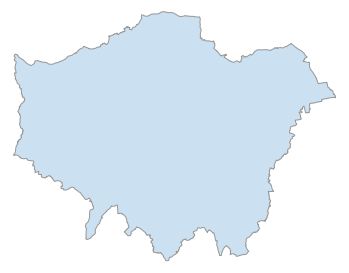

In [8]:
# project the geometry to the appropriate UTM zone (calculated automatically) then plot it
city = ox.project_gdf(city)
fig, ax = ox.plot_shape(city)

The reason why a error returns when 'London' or 'London, United Kingdom' is because the API returns a point for both of those queries.

https://github.com/gboeing/osmnx/issues/16

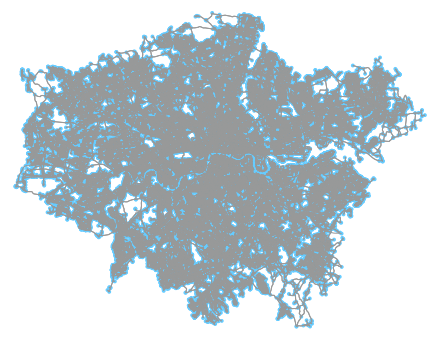

In [9]:
G = ox.graph_from_place('Greater London', network_type='drive')
fig, ax = ox.plot_graph(G)

The above query loads in a shapefile of Greater London and plots all the driveable roads. The cell took around 5-10 minutes to load as there are tens of thousands of nodes to process.

## Get the shapefile for multiple areas, project it, display it, and save it

In [73]:
inner_london_boroughs = ['City and County of the City of London',
                         'London Borough of Camden, London',
                        'Royal Borough of Greenwich, London',
                        'London Borough of Hackney, London',
                        'London Borough of Hammersmith and Fulham, London',
                        'London Borough of Islington, London',
                        'Royal Borough of Kensington and Chelsea, London',
                        'London Borough of Lambeth, London',
                        'London Borough of Lewisham, London',
                        'London Borough of Southwark, London',
                        'London Borough of Tower Hamlets, London',
                        'London Borough of Wandsworth, London',
                        'City of Westminster, London']

In [74]:
inner_london = ox.gdf_from_places(inner_london_boroughs, gdf_name='london')
inner_london

,geometry,place_name,bbox_north,bbox_south,bbox_east,bbox_west
0,"POLYGON ((-0.11382 51.51826, -0.11381 51.51822...","City of London, Greater London, England, Unite...",51.523321,51.506870,-0.072726,-0.113821
1,"POLYGON ((-0.21354 51.55518, -0.21344 51.55509...","London Borough of Camden, London, Greater Lond...",51.573017,51.512652,-0.105350,-0.213537
2,"POLYGON ((-0.02637 51.48158, -0.02611 51.48151...","Royal Borough of Greenwich, London, Greater Lo...",51.513585,51.423735,0.124161,-0.026368
3,"POLYGON ((-0.10451 51.56471, -0.10379 51.56432...","London Borough of Hackney, London, Greater Lon...",51.577784,51.519814,-0.016527,-0.104511
4,"POLYGON ((-0.25509 51.50432, -0.25507 51.50431...","London Borough of Hammersmith and Fulham, Lond...",51.532752,51.463898,-0.177627,-0.255090
5,"POLYGON ((-0.14254 51.56892, -0.14222 51.56868...","London Borough of Islington, London, Greater L...",51.575508,51.518541,-0.076358,-0.142537
6,"POLYGON ((-0.22873 51.52988, -0.22837 51.52921...","Royal Borough of Kensington and Chelsea, Londo...",51.530353,51.477222,-0.149840,-0.228728
7,"POLYGON ((-0.15123 51.46588, -0.15099 51.46423...","London Borough of Lambeth, London, Greater Lon...",51.509871,51.410981,-0.078307,-0.151231
8,"POLYGON ((-0.07509 51.42880, -0.07503 51.42856...","London Borough of Lewisham, London, Greater Lo...",51.493564,51.413550,0.039045,-0.075093
9,"POLYGON ((-0.11144 51.49645, -0.11097 51.49558...","London Borough of Southwark, London, Greater L...",51.509909,51.420609,-0.029373,-0.111443


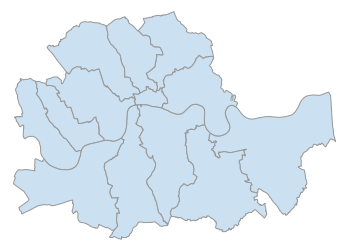

In [77]:
inner_london = ox.project_gdf(inner_london)
fig, ax = ox.plot_shape(inner_london)

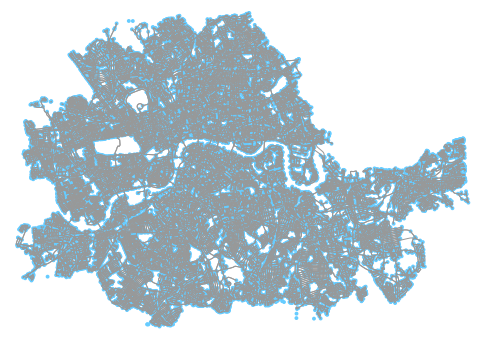

In [81]:
G = ox.graph_from_place(inner_london_boroughs, network_type='drive', retain_all=True)
fig, ax = ox.plot_graph(G, save=True, filename='inner_london_roads')

### Extracting relevant data from 1 borough

In [3]:
G = ox.graph_from_place('London Borough of Southwark, London', network_type='all') 
edge_attributes = ox.graph_to_gdfs(G, nodes=False)
edge_attributes.head()

,u,v,key,osmid,highway,oneway,length,geometry,maxspeed,name,ref,access,service,tunnel,lanes,width,bridge,est_width,junction,area
0,4422107137,4172980673,0,416550576,footway,False,99.759,"LINESTRING (-0.06058 51.50053, -0.05989 51.500...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2661416968,1549493663,0,260621252,trunk,True,26.668,"LINESTRING (-0.06847 51.47391, -0.06843 51.473...",20 mph,Peckham High Street,A202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2661416968,1936671458,0,260621253,secondary_link,True,8.504,"LINESTRING (-0.06847 51.47391, -0.06855 51.473...",20 mph,Peckham High Street,B215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7183269898,6448649936,0,687864046,footway,False,22.719,"LINESTRING (-0.07106 51.47331, -0.07113 51.47311)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7183269898,6448649935,0,"[769530464, 769530466]",footway,False,6.863,"LINESTRING (-0.07106 51.47331, -0.07104 51.473...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


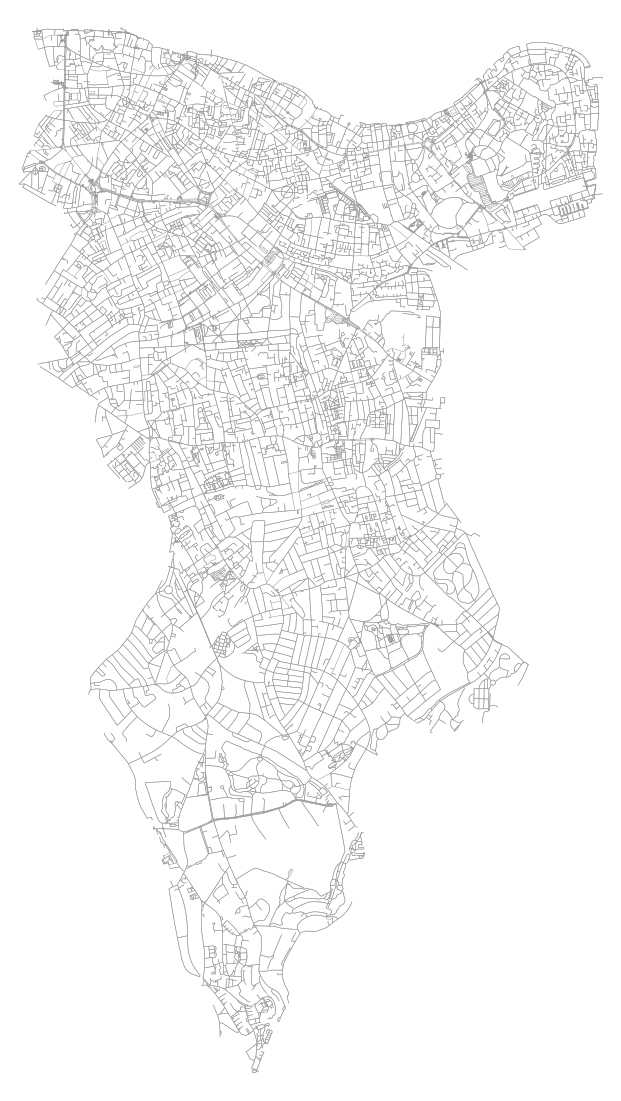

In [7]:
fig, ax = ox.plot_graph(G, bgcolor='white', axis_off=True, node_size=0, node_color='w', node_edgecolor='gray', node_zorder=2, edge_linewidth=0.5, edge_alpha=1, fig_height=20, dpi=300)

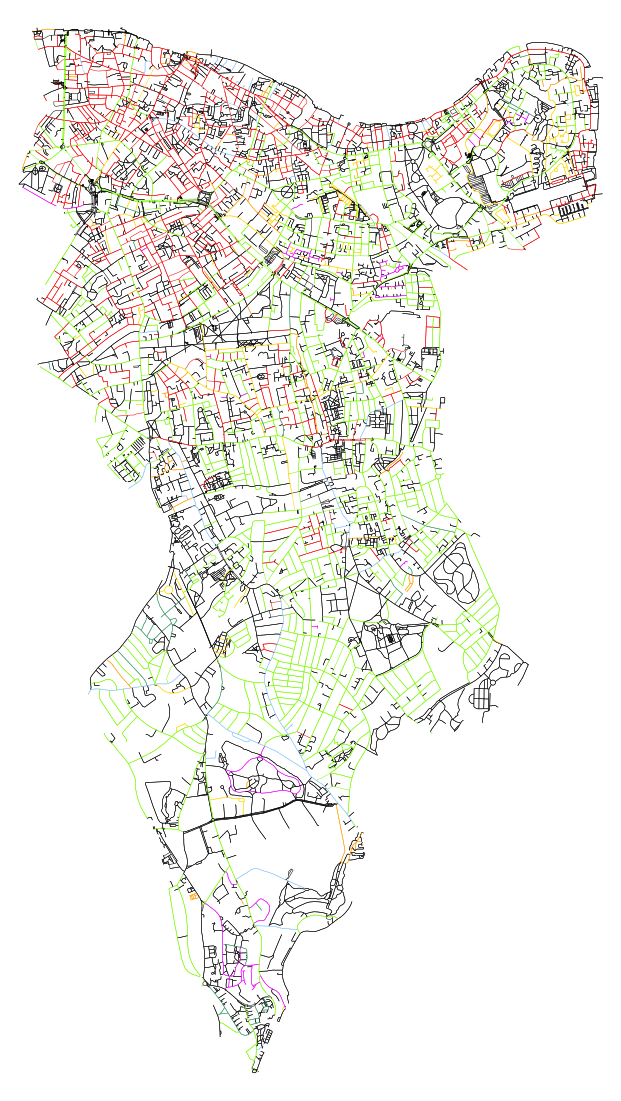

In [7]:
def colourcode(x):
    if ('street' in x):
        return '#f10000'
    elif ('road' in x):
        return '#7CFC00'
    elif ('lane' in x):
        return '#91c8ff'
    elif ('avenue' in x):
        return '#3c9c69'
    elif ('walk' in x):
        return '#ffa000'
    elif ('sqaure' in x):
        return '#004aff'
    elif ('drive' in x):
        return '#ef00ff'
    elif ('way' in x):
        return '#ffd800'
    else:
        return 'black'
place = 'London Borough of Southwark, London'    
G = ox.graph_from_place(place, network_type='all') 

# For the colouring, we take the attributes from each edge found extract the road name, and use the function above to create the colour array
edge_attributes = ox.graph_to_gdfs(G, nodes=False)
ec = [colourcode(str(row['name']).lower()) for index, row in edge_attributes.iterrows()]

# We can finally draw the plot
fig, ax = ox.plot_graph(G, bgcolor='white', axis_off=True, node_size=0, node_color='w', node_edgecolor='gray', node_zorder=2,
                        edge_color=ec, edge_linewidth=0.5, edge_alpha=1, fig_height=20, save=True, dpi=1000)

In [52]:
unique_names = set()
for column in edge_attributes['name']:
    if str(column) != 'nan':
        unique_names.add(str(column))
        
list(unique_names)
unique_names

{"['Champion Park', 'Grove Lane']",
 'Wingfield Mews',
 'Strakers Road',
 'Garter Way',
 'Turney Road',
 'Balfour Road',
 'Robinson Road',
 'Rochester Walk',
 'Brewhouse Walk',
 'Isaac Way',
 'Duchess Walk',
 'Waghorn Street',
 'Pope Street',
 'Keston Road',
 'Elsted Street',
 'Cossall Walk',
 "['Alscot Road', 'Alscot Way']",
 'Sears Street',
 'Claude Road',
 'Hichisson Road',
 'Montague Square',
 'Ardbeg Road',
 'Spring Tide Close',
 'John Ruskin Street',
 'Innes Street',
 'Sweeney Crescent',
 'Howden Street',
 'Great Dover Street',
 'Grummant Road',
 'Hazel Close',
 'Ewer Street',
 'Hawkstone Road',
 'King Stairs Close',
 'Reynolds Road',
 'Holyoak Road',
 'Vicarage Grove',
 'Jennings Road',
 "['Green Dale', 'Champion Hill']",
 'Hunters Meadow',
 'Addington Square',
 'Loman Street',
 'Homestall Road',
 'Portland Street',
 'Chandler Way',
 'Cottage Green',
 'Whitehorse Mews',
 'Quadrangle Close',
 'Robert Dashwood Way',
 'Graces Road',
 'Arnside Street',
 'Milkwell Yard',
 'Battle Bri

In [57]:
streets = 0
roads = 0
drive = 0
place = 0
walk = 0
lane = 0
others = 0

for name in unique_names:
    if 'street' in name:
        streets += 1
    elif 'road' in name:
        roads += 1
    elif 'drive' in name:
        drive += 1
    elif 'place' in name:
        place += 1
    elif 'walk' in name:
        walk += 1
    elif 'lane' in name:
        lane += 1
    else:
        others += 1
print(streets, roads, drive, place, walk, lane, others)
print(unique_names)

0 2 0 0 2 0 2036
{"['Champion Park', 'Grove Lane']", 'Wingfield Mews', 'Strakers Road', 'Garter Way', 'Turney Road', 'Balfour Road', 'Robinson Road', 'Rochester Walk', 'Brewhouse Walk', 'Isaac Way', 'Duchess Walk', 'Waghorn Street', 'Pope Street', 'Keston Road', 'Elsted Street', 'Cossall Walk', "['Alscot Road', 'Alscot Way']", 'Sears Street', 'Claude Road', 'Hichisson Road', 'Montague Square', 'Ardbeg Road', 'Spring Tide Close', 'John Ruskin Street', 'Innes Street', 'Sweeney Crescent', 'Howden Street', 'Great Dover Street', 'Grummant Road', 'Hazel Close', 'Ewer Street', 'Hawkstone Road', 'King Stairs Close', 'Reynolds Road', 'Holyoak Road', 'Vicarage Grove', 'Jennings Road', "['Green Dale', 'Champion Hill']", 'Hunters Meadow', 'Addington Square', 'Loman Street', 'Homestall Road', 'Portland Street', 'Chandler Way', 'Cottage Green', 'Whitehorse Mews', 'Quadrangle Close', 'Robert Dashwood Way', 'Graces Road', 'Arnside Street', 'Milkwell Yard', 'Battle Bridge Lane', 'Grotto Court', "['Bond